In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
leads= pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Data Cleaning
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Removing columns that have more than 3000 missing values
for col in leads.columns:
    if leads[col].isna().sum()>3000:
        leads.drop(col,axis=1,inplace=True)

In [7]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
leads.shape

(9240, 31)

In [9]:
leads.drop(['City','Country'],axis=1,inplace=True)

In [10]:
leads.shape

(9240, 29)

In [11]:
# to get percentage of the missing values

leads.isna().sum()/leads.shape[0]*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [12]:
round(leads.isna().sum()/leads.shape[0]*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [13]:
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [14]:
leads['Newspaper'].astype('category').value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [15]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [16]:
leads['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
leads['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
leads.drop(['How did you hear about X Education','Lead Profile'],axis=1,inplace=True)

In [19]:
leads.shape

(9240, 27)

In [20]:
for column in leads:
    print(leads[column].astype('category').value_counts())
    print("--------------------------------------------------")

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
--------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
--------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
--------------------

In [21]:
# IN these columns the Select keyword means the lead had not selceted the option or mention the value. 
# So, it is similar like NULL or missing values and they are a lot in number so better to drop them
# in colums like "Do not call" and "Do not email" one particular value is occuring in large amount so it ans like imbalance
# data. So, this is not good for analysis

In [22]:
leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
           'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
          'I agree to pay the amount through cheque',],axis=1,inplace=True)

In [23]:
leads.shape

(9240, 15)

In [24]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [25]:
leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [26]:
leads.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [27]:
leads=leads[~pd.isnull(leads['What is your current occupation'])]

In [28]:
leads.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [29]:
leads=leads[~pd.isnull(leads['TotalVisits'])]
leads.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [30]:
leads=leads[~pd.isnull(leads['Lead Source'])]

In [31]:
leads=leads[~pd.isnull(leads['Specialization'])]

In [32]:
leads.isna().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [33]:
leads.shape

(6373, 14)

In [34]:
print("Total rows retained is ",round(6373/9240*100,2)," percent")

Total rows retained is  68.97  percent


In [35]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [36]:
leads.drop(['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [37]:
temp=leads.select_dtypes(include='object')

In [38]:
temp.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Last Activity                             object
Specialization                            object
What is your current occupation           object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [39]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [41]:
leads=pd.concat([leads,dummy],axis=1)

In [42]:
leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [43]:
sum(leads.dtypes=='object')

0

In [44]:
y=leads['Converted']

In [45]:
X=leads.drop(['Converted'],axis=1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
y.value_counts()

0    3308
1    3065
Name: Converted, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000,stratify=y)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler=MinMaxScaler()

In [51]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [52]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6716,0.011952,0.147447,0.054545,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4348,0.011952,0.554137,0.054545,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
532,0.011952,0.102113,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6266,0.035857,0.546215,0.054545,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1637,0.000000,0.000000,0.000000,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_reg=LogisticRegression()

In [55]:
from sklearn.feature_selection import RFE

In [56]:
rfe=RFE(log_reg,15)

In [57]:
rfe=rfe.fit(X_train,y_train)

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DIPU\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 59),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 39),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_testone', False, 60),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 6),
 ('Last Activity_Email Link Cli

In [59]:
col=X_train.columns[rfe.support_]

In [60]:
X_train=X_train[col]

In [61]:
import statsmodels.api as sm

In [62]:
X_train_sm=sm.add_constant(X_train)

In [63]:
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [64]:
res=logm2.fit()

In [65]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.7
Date:                Thu, 04 Feb 2021   Deviance:                       4167.5
Time:                        17:28:50   Pearson chi2:                 4.67e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9656      0.101     -9.595      0.000      -1.163      -0.768
TotalVisits                                              5.3405      2.670      2.000      0.046       0.106      10.575
Total Time Spent on Website                              4.1242      0.181     22.758      0.000       3.769       4.479
Lead Origin_Lead Add Form                                3.8218      0.241     15.849      0.000       3.349       4.294
Lead Source_Olark Chat                                   1.3748      0.126     10.927      0.000       1.128       1.621
Lead Source_Welingak Website                             2.2846      1.034      2.210      0.027       0.258       4.311
Do Not Email_Yes                                        -1.7162      0.198     -8.676      0.000      -2.104      -1.328
Last Activity_Converted to Lead                         -0.8866      0.244     -3.634      0.000      -1.365      -0.408
Last Activity_Olark Chat Conversation                   -1.3151      0.195     -6.744      0.000      -1.697      -0.933
What is your current occupation_Housewife               24.3066   3.57e+04      0.001      0.999   -6.99e+04       7e+04
What is your current occupation_Working Professional     2.4784      0.188     13.181      0.000       2.110       2.847
Last Notable Activity_Email Link Clicked                -1.0878      0.291     -3.735      0.000      -1.659      -0.517
Last Notable Activity_Email Opened                      -0.8905      0.092     -9.681      0.000      -1.071      -0.710
Last Notable Activity_Had a Phone Conversation          22.9809   2.16e+04      0.001      0.999   -4.23e+04    4.23e+04
Last Notable Activity_Modified                          -1.2047      0.105    -11.462      0.000      -1.411      -0.999
Last Notable Activity_Unreachable                        2.2965      1.065      2.157      0.031       0.210       4.383
========================================================================================================================
"""

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)

In [68]:
vif

,Features,VIF
1,Total Time Spent on Website,2.0
13,Last Notable Activity_Modified,2.0
0,TotalVisits,1.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Olark Chat,1.0
4,Lead Source_Welingak Website,1.0
5,Do Not Email_Yes,1.0
6,Last Activity_Converted to Lead,1.0
7,Last Activity_Olark Chat Conversation,1.0
8,What is your current occupation_Housewife,1.0


In [69]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Unreachable','Last Notable Activity_Had a Phone Conversation'],axis=1,inplace=True)

In [70]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2097.0
Date:                Thu, 04 Feb 2021   Deviance:                       4194.1
Time:                        17:28:51   Pearson chi2:                 4.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9266      0.100     -9.257      0.000      -1.123      -0.730
TotalVisits                                              5.5377      2.680      2.066      0.039       0.285      10.791
Total Time Spent on Website                              4.1011      0.181     22.718      0.000       3.747       4.455
Lead Origin_Lead Add Form                                3.8069      0.241     15.790      0.000       3.334       4.279
Lead Source_Olark Chat                                   1.3584      0.126     10.810      0.000       1.112       1.605
Lead Source_Welingak Website                             2.2802      1.034      2.206      0.027       0.254       4.306
Do Not Email_Yes                                        -1.7434      0.198     -8.821      0.000      -2.131      -1.356
Last Activity_Converted to Lead                         -0.8997      0.244     -3.693      0.000      -1.377      -0.422
Last Activity_Olark Chat Conversation                   -1.3279      0.195     -6.812      0.000      -1.710      -0.946
What is your current occupation_Working Professional     2.4725      0.188     13.155      0.000       2.104       2.841
Last Notable Activity_Email Link Clicked                -1.1206      0.291     -3.853      0.000      -1.691      -0.550
Last Notable Activity_Email Opened                      -0.9188      0.092    -10.036      0.000      -1.098      -0.739
Last Notable Activity_Modified                          -1.2244      0.105    -11.704      0.000      -1.429      -1.019
========================================================================================================================
"""

In [71]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'])
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Total Time Spent on Website,2.0
11,Last Notable Activity_Modified,2.0
0,TotalVisits,1.0
2,Lead Origin_Lead Add Form,1.0
3,Lead Source_Olark Chat,1.0
4,Lead Source_Welingak Website,1.0
5,Do Not Email_Yes,1.0
6,Last Activity_Converted to Lead,1.0
7,Last Activity_Olark Chat Conversation,1.0
8,What is your current occupation_Working Profes...,1.0


In [121]:
y_train_pred=res.predict(X_train_sm)

In [107]:
#y_train_pred=y_train_pred.values.reshape(-1,1)

In [122]:
y_train_pred_final=pd.DataFrame(data={'Converted':y_train.values,"Conversion_prob":y_train_pred})

In [123]:
y_train_pred_final.head()

,Converted,Conversion_prob
6716,0,0.038620
4348,0,0.620840
532,0,0.156380
6266,0,0.814355
1637,1,0.135159


In [124]:
y_train_pred_final['predicted']=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0)

In [125]:
y_train_pred_final

,Converted,Conversion_prob,predicted
6716,0,0.038620,0
4348,0,0.620840,1
532,0,0.156380,0
6266,0,0.814355,1
1637,1,0.135159,0
...,...,...,...
6555,0,0.379838,0
3263,0,0.075301,0
732,0,0.755123,1
1791,0,0.306910,0


In [126]:
from sklearn.metrics import confusion_matrix

In [129]:
confusion=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[1929,  387],
       [ 559, 1586]], dtype=int64)

In [130]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.787939923783905

In [131]:
TP=confusion[1,1]

In [133]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [135]:
#sensitivuty
TP/(TP+FN)

0.7393939393939394

In [136]:
#specificity
TN/(TN+FP)

0.832901554404145

In [170]:
def draw(actual,prob):
    fpr,tpr,threshold=metrics.roc_curve(actual,prob,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="ROC curve (area=%0.2f)" % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc='lower right')
    plt.show()
    return None

In [171]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

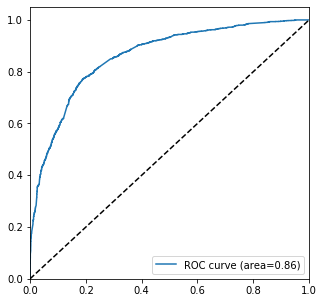

In [172]:
draw(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

In [175]:
numbers=[float(i)/10 for i in range(10)]

In [177]:
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>i else 0)
    

In [179]:
y_train_pred_final.head(7)

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6716,0,0.038620,0,1,0,0,0,0,0,0,0,0,0
4348,0,0.620840,1,1,1,1,1,1,1,1,0,0,0
532,0,0.156380,0,1,1,0,0,0,0,0,0,0,0
6266,0,0.814355,1,1,1,1,1,1,1,1,1,1,0
1637,1,0.135159,0,1,1,0,0,0,0,0,0,0,0
2686,1,0.995201,1,1,1,1,1,1,1,1,1,1,1
8321,1,0.310966,0,1,1,1,1,0,0,0,0,0,0


In [180]:
cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])

In [189]:
for i in numbers:
    cm1=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total_1=sum(sum(cm1))
    s=cm1[0,0]+cm1[1,1]
    accuracy=s/total_1
    sensitivity=cm1[1,1]/(cm1[1,1]+cm1[1,0])
    specificity=cm1[0,0]/(cm1[0,0]+cm1[0,1])
    cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]

In [191]:
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.480834,1.000000,0.000000
0.1,0.1,0.555257,0.990676,0.151986
0.2,0.2,0.696032,0.944056,0.466321
0.3,0.3,0.74759,0.903963,0.602763
0.4,0.4,0.785474,0.808392,0.764249
0.5,0.5,0.78794,0.739394,0.832902
0.6,0.6,0.770455,0.665268,0.867876
0.7,0.7,0.73683,0.542657,0.916667
0.8,0.8,0.705896,0.436830,0.955095
0.9,0.9,0.633714,0.255944,0.983592


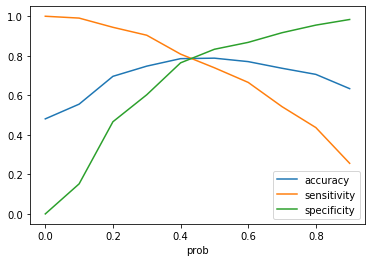

In [198]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensitivity','specificity'])
plt.show()

In [199]:
# So, the final threshold is 0.42